#### mpg = milhas por galão (4.55 L) (1 milha = 1,60934km/h)
### ---------
#### cylinders = quantidaded de ciclindros do veículo
### ---------
#### cubicinches = Representada por “cc” ou “cm³” (centímetros cúbicos), a cilindrada é o volume de combustível e ar que cabe em cada cilindro do motor. (1 Polegada cúbica (cubicinches) = 16,3871 cilindradas (cm³))
### ---------
#### hp = quantidade de cavalos de potência do veículo
### ---------
#### weightlbs = peso em libras (1 libra = 0,453592 kg)
### ---------
#### time-to-60 = quantidade de tempo em segundos que leva para o veículo de 0 a 60 milhas.
### ---------
#### year = Ano de fabricação (1970 - 1982)
### ---------
#### brand = Origem do veículo

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_cars = pd.read_csv(r'Arquivos\cars.csv', 
                      converters={'year': str},
                      names=['km/l', 'cylinders' , 'cubic-centimeters', 'horsepower', 'weightkg', 'time-to-100km/h', 'year', 'origin', 'name'],
                      header=0)

In [3]:
df_cars['name'] = df_cars['name'].apply(lambda x: x.title())
df_cars['km/l'] = round(df_cars['km/l'] * 0.425143707, 2)
df_cars['cubic-centimeters'] = round(df_cars['cubic-centimeters'] * 16.3871, 2)
df_cars['weightkg'] = round(df_cars['weightkg'] * 0.453592, 2)
df_cars['name_year'] = df_cars['name'] + ', ' + df_cars['year']
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   km/l               397 non-null    float64
 1   cylinders          397 non-null    int64  
 2   cubic-centimeters  397 non-null    float64
 3   horsepower         392 non-null    float64
 4   weightkg           397 non-null    float64
 5   time-to-100km/h    397 non-null    float64
 6   year               397 non-null    object 
 7   origin             397 non-null    object 
 8   name               397 non-null    object 
 9   name_year          397 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 31.1+ KB


In [4]:
df_cars

,km/l,cylinders,cubic-centimeters,horsepower,weightkg,time-to-100km/h,year,origin,name,name_year
0,7.65,8,5030.84,130.0,1589.39,12.0,70,usa,Chevrolet Chevelle Malibu,"Chevrolet Chevelle Malibu, 70"
1,6.38,8,5735.48,165.0,1675.12,11.5,70,usa,Buick Skylark 320,"Buick Skylark 320, 70"
2,7.65,8,5211.10,150.0,1558.54,11.0,70,usa,Plymouth Satellite,"Plymouth Satellite, 70"
3,6.80,8,4981.68,150.0,1557.18,12.0,70,usa,Amc Rebel Sst,"Amc Rebel Sst, 70"
4,7.23,8,4948.90,140.0,1564.44,10.5,70,usa,Ford Torino,"Ford Torino, 70"
...,...,...,...,...,...,...,...,...,...,...
392,11.48,4,2294.19,86.0,1265.52,15.6,82,usa,Ford Mustang Gl,"Ford Mustang Gl, 82"
393,18.71,4,1589.55,52.0,966.15,24.6,82,europe,Vw Pickup,"Vw Pickup, 82"
394,13.60,4,2212.26,84.0,1040.99,11.6,82,usa,Dodge Rampage,"Dodge Rampage, 82"
395,11.90,4,1966.45,79.0,1190.68,18.6,82,usa,Ford Ranger,"Ford Ranger, 82"


### Economia de combústivel

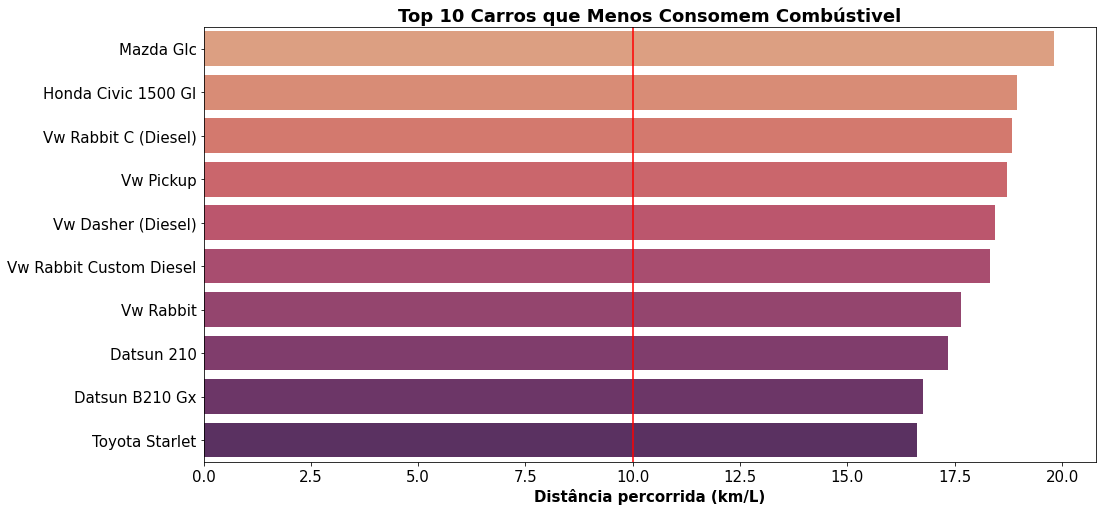

In [5]:
plt.figure(figsize=(16,8)).patch.set_facecolor('white')
plt.rcParams.update({'font.size': 15})

sns.barplot(data=df_cars[['km/l', 'name']].sort_values(by='km/l', ascending=False).iloc[:10],
            x='km/l', y='name', palette='flare')

plt.title('Top 10 Carros que Menos Consomem Combústivel', fontsize=18, weight='bold')
plt.xlabel('Distância percorrida (km/L)', fontsize=15, weight='bold')
plt.ylabel('');
plt.axvline(x=round(df_cars['km/l'].mean(), 0), ymin=0, ymax=1, color='red');

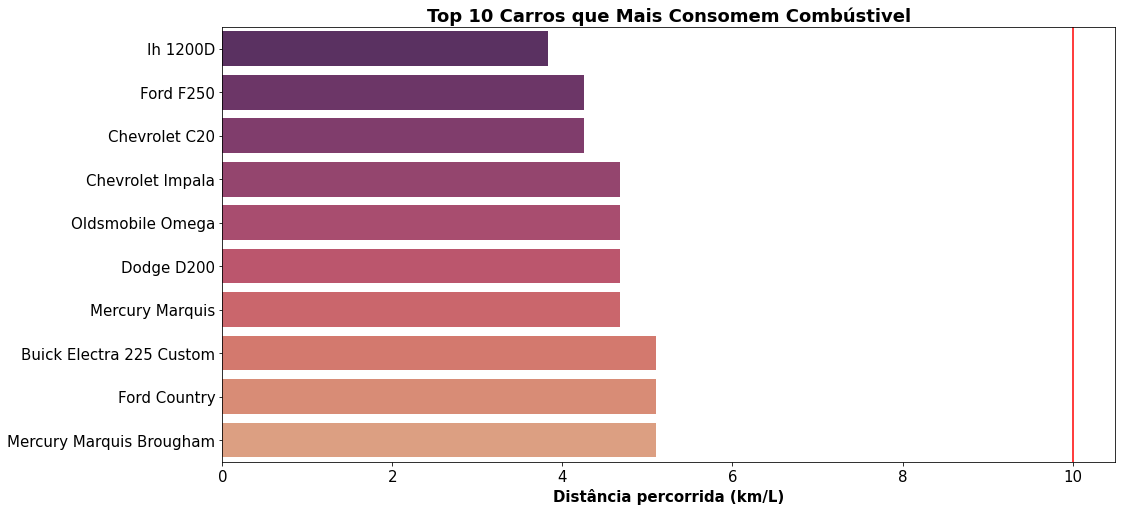

In [6]:
plt.figure(figsize=(16,8)).patch.set_facecolor('white')
plt.rcParams.update({'font.size': 15})

sns.barplot(data=df_cars.sort_values(by='km/l').iloc[:10],
            x='km/l', y='name', palette='flare_r')

plt.title('Top 10 Carros que Mais Consomem Combústivel', fontsize=18, weight='bold')
plt.xlabel('Distância percorrida (km/L)', fontsize=15, weight='bold')
plt.ylabel('');
plt.axvline(x=round(df_cars['km/l'].mean(), 0), ymin=0, ymax=1, color='red');

#### mpg = milhas por galão (4.55 L) (1 milha = 1,60934km/h)
#### time-to-60 = quantidade de tempo em segundos que leva para o veículo de 0 a 60 milhas.
### ----------------------------------------------------------------------------------------------------
### - Menos tempo para ir de 0 a 60 milhas. (0 a 96,5 km/h - economia do tempo)

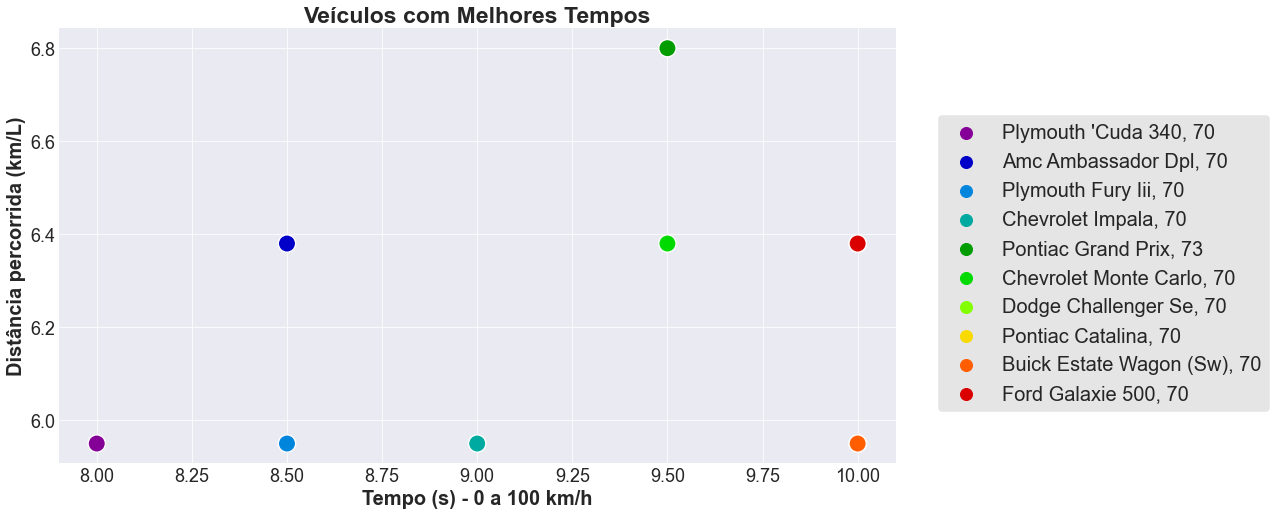

In [7]:
plt.figure(figsize=(15,8)).patch.set_facecolor('white')
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-darkgrid')

sns.scatterplot(data=df_cars.sort_values(by='time-to-100km/h').iloc[:10],\
                x='time-to-100km/h', y='km/l', hue='name_year', s=300, palette='nipy_spectral')

plt.title('Veículos com Melhores Tempos', fontsize=23, weight='bold')
plt.xlabel('Tempo (s) - 0 a 100 km/h', fontsize=20, weight='bold')
plt.ylabel('Distância percorrida (km/L)', fontsize=20, weight='bold')

plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0., fontsize=20, frameon=True, framealpha=0.2, facecolor='grey', markerscale=2);

#### - Menos combústivel consumido em função do tempo para alcançar 60 milhas. (0 a 96,5 km/h / combústivel)

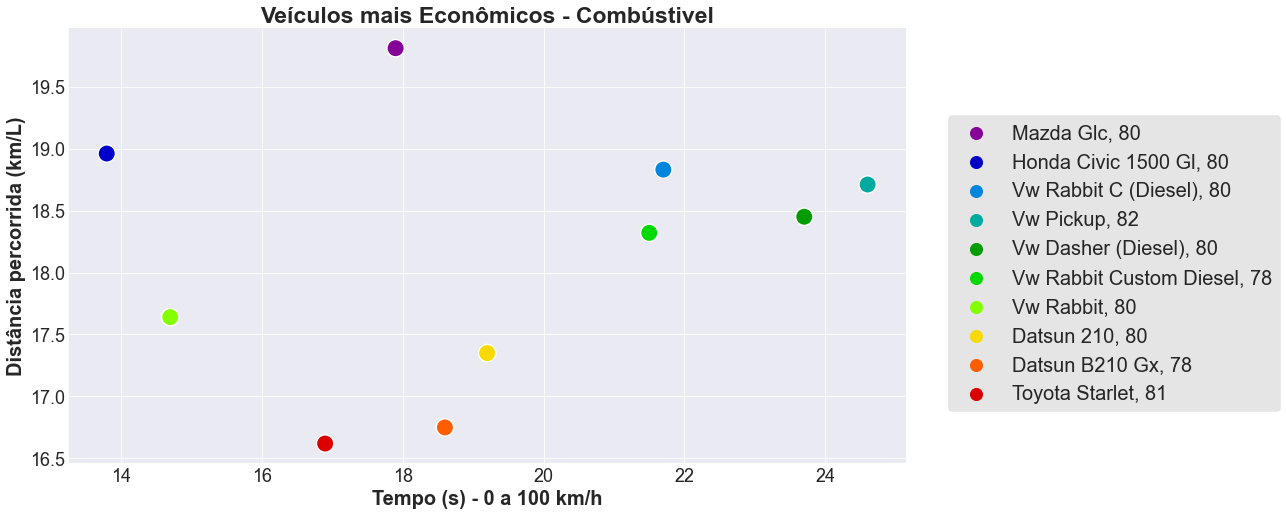

In [8]:
plt.figure(figsize=(15,8)).patch.set_facecolor('white')
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-darkgrid')

sns.scatterplot(data=df_cars.sort_values(by='km/l', ascending=False).iloc[:10],\
                x='time-to-100km/h', y='km/l', hue='name_year', s=300, palette='nipy_spectral')

plt.title('Veículos mais Econômicos - Combústivel', fontsize=23, weight='bold')
plt.xlabel('Tempo (s) - 0 a 100 km/h', fontsize=20, weight='bold')
plt.ylabel('Distância percorrida (km/L)', fontsize=20, weight='bold')

plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0., fontsize=20, frameon=True, framealpha=0.2, facecolor='grey', markerscale=2);

### Comparando diferentes versões

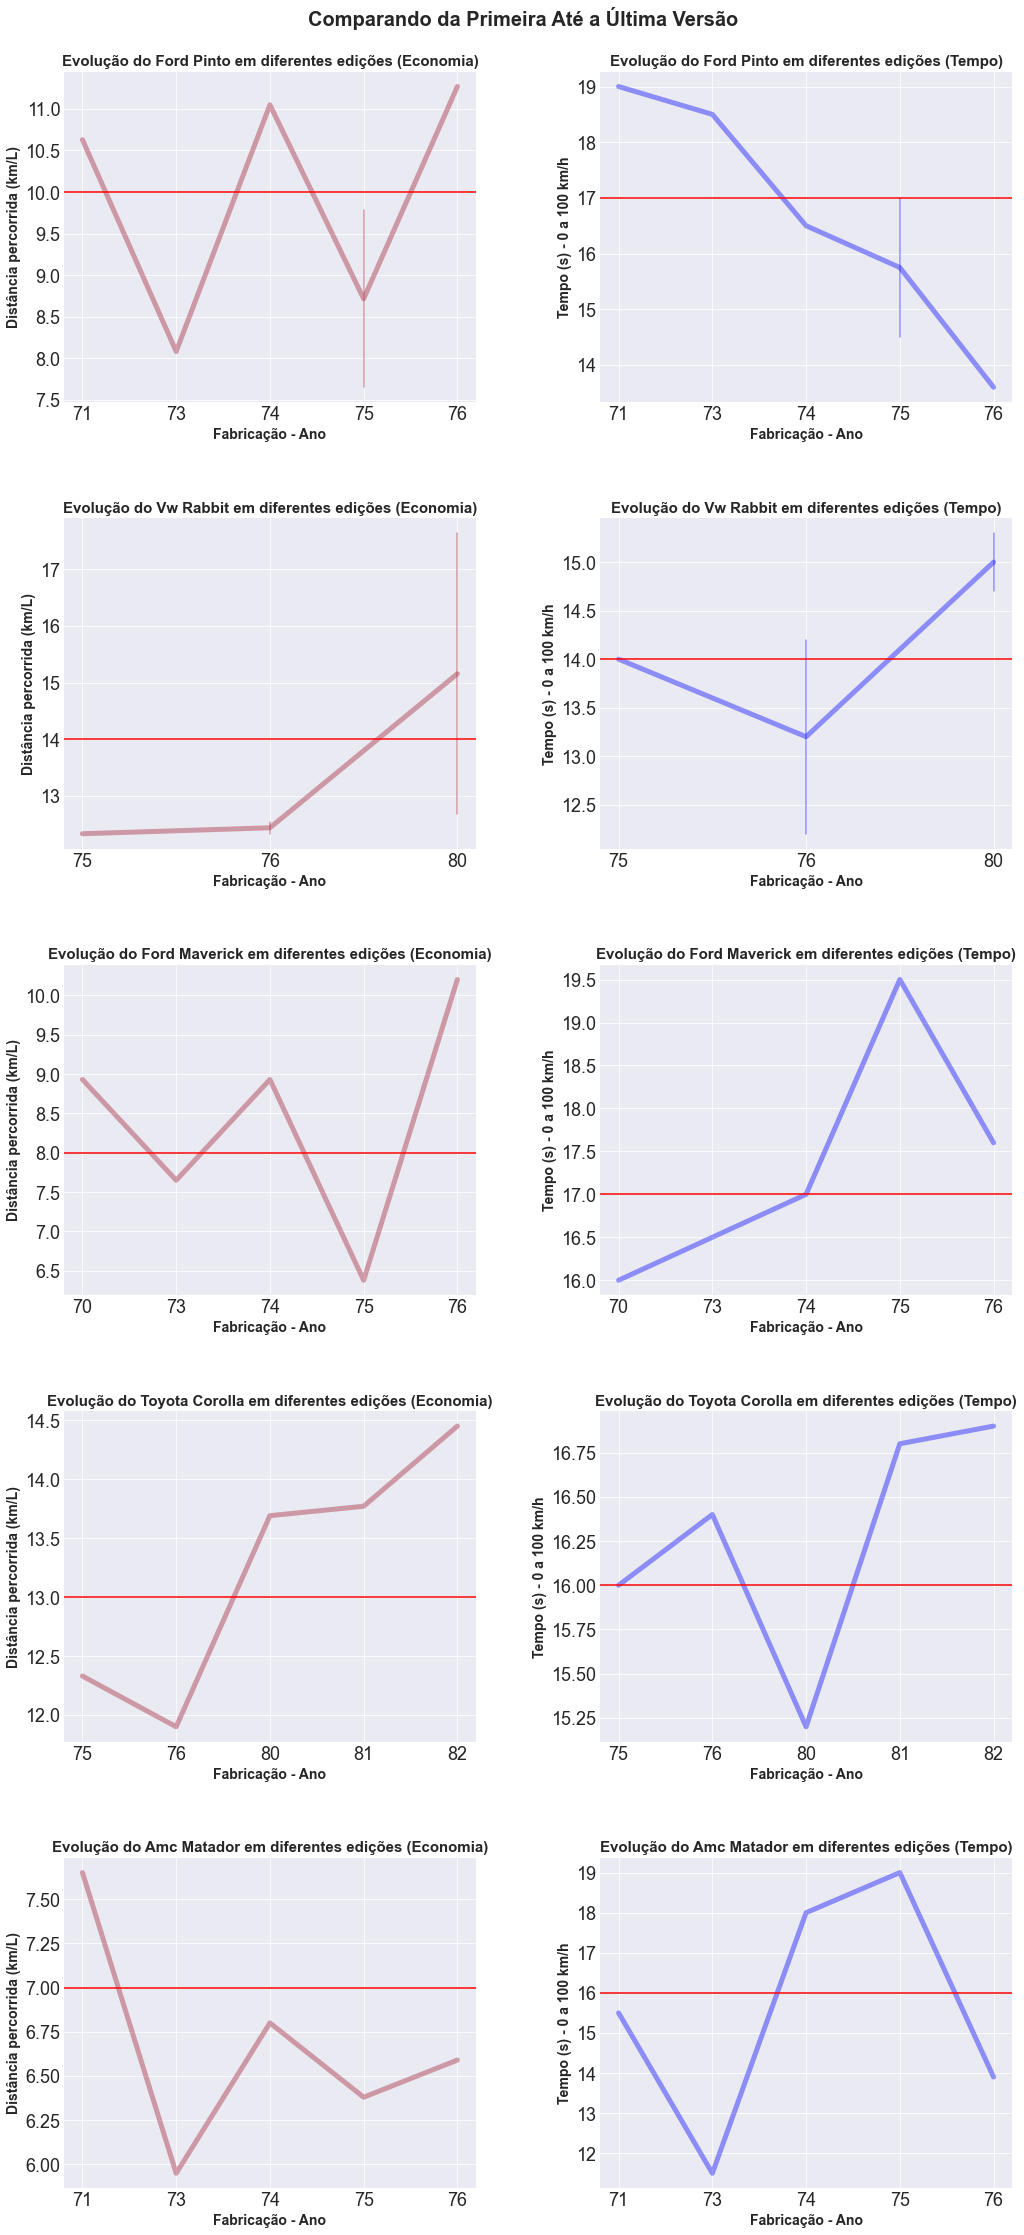

In [9]:
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(5, 2, figsize=(17, 6), sharey=False)
fig.suptitle('Comparando da Primeira Até a Última Versão', fontsize=20, y=5.15, weight='bold')

list_cars = df_cars['name'].value_counts()[:5]

for i in range(0, 5):
    ax1 = sns.lineplot(ax=axes[i][0], x='year', y='km/l',
                       data=df_cars[['year', 'km/l']][df_cars['name'] == list_cars.index[i]],
                       color='#a11d33', linewidth=5, alpha=0.4, err_style='bars')
    
        
    ax1.set_title(f'Evolução do {list_cars.index[i]} em diferentes edições (Economia)', fontsize=15, weight='bold')
    ax1.set_xlabel('Fabricação - Ano', fontsize=14, weight='bold')
    ax1.set_ylabel('Distância percorrida (km/L)', fontsize=14, weight='bold')
    ax1.axhline(y=round(df_cars['km/l'][df_cars['name'] == list_cars.index[i]].mean()), xmin=0, xmax=1, color='red')


    ax2 = sns.lineplot(ax=axes[i][1], x='year', y='time-to-100km/h',
                       data=df_cars[['year', 'time-to-100km/h']][df_cars['name'] == list_cars.index[i]], 
                       color='blue', linewidth=5, alpha=0.4, err_style='bars')

    ax2.set_title(f'Evolução do {list_cars.index[i]} em diferentes edições (Tempo)', fontsize=15, weight='bold')
    ax2.set_xlabel('Fabricação - Ano', fontsize=14, weight='bold')
    ax2.set_ylabel('Tempo (s) - 0 a 100 km/h', fontsize=14, weight='bold')
    ax2.axhline(y=round(df_cars['time-to-100km/h'][df_cars['name'] == list_cars.index[i]].mean()), xmin=0, xmax=1, color='red')


plt.subplots_adjust(bottom=0.1,
                    top=5, 
                    wspace=0.3, 
                    hspace=0.35);

### Top 5 veículos com - e + cavalos de potência

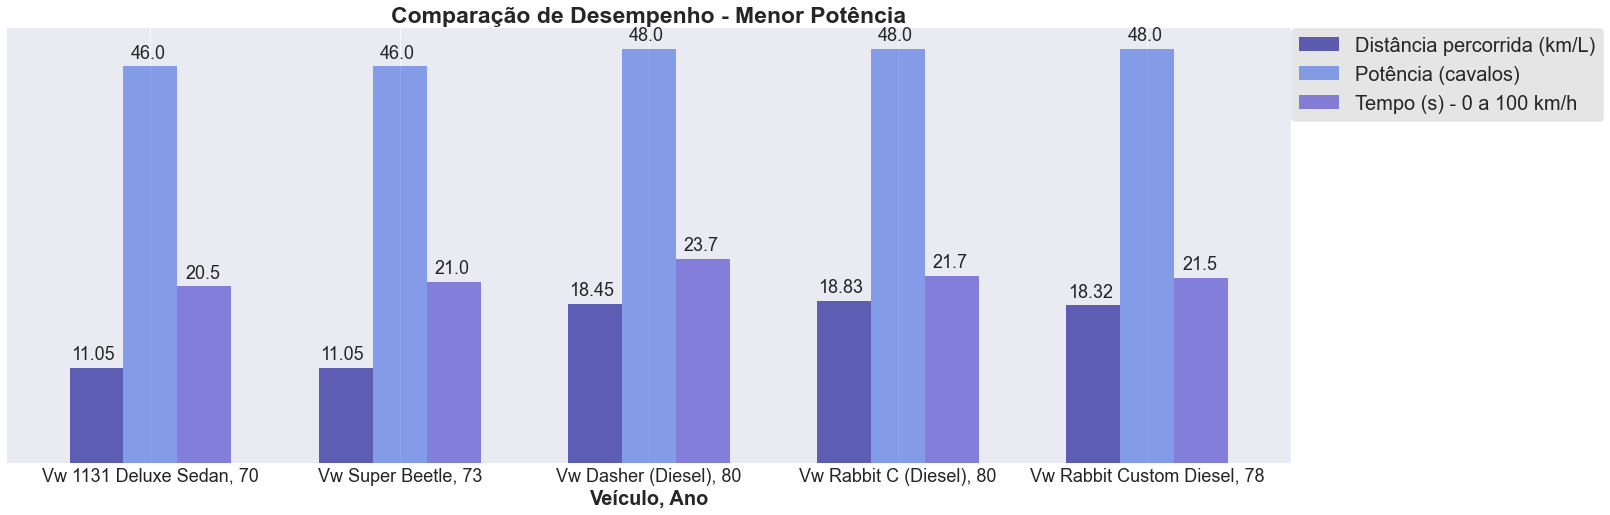

In [10]:
plt.rcParams['figure.figsize'] = [23, 8]

select_columns = ['km/l', 'horsepower', 'time-to-100km/h']
x_position = [0.32, .08, -.14]

df_cars.sort_values(by='horsepower').iloc[:5].plot(x='name_year',
                                                   y=['km/l', 'horsepower', 'time-to-100km/h'], 
                                                   kind="bar", 
                                                   color = ['darkblue','royalblue', '#3F37C9'], alpha = .6, 
                                                   label=['Distância percorrida (km/L)', 'Potência (cavalos)', 'Tempo (s) - 0 a 100 km/h'],
                                                   width=0.65)

 
for i in range(0, 3):
    for index, value in enumerate(df_cars.sort_values(by='horsepower').iloc[:5][select_columns[i]]):
        plt.text(index - x_position[i], value + 1, str(df_cars.sort_values(by='horsepower').iloc[index][select_columns[i]]))


plt.title('Comparação de Desempenho - Menor Potência', fontsize=23, weight='bold')
plt.xlabel('Veículo, Ano', fontsize=20, weight='bold')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize=20, frameon=True, framealpha=0.2, facecolor='grey', markerscale=2)
plt.yticks([], [])
plt.xticks(rotation=0);

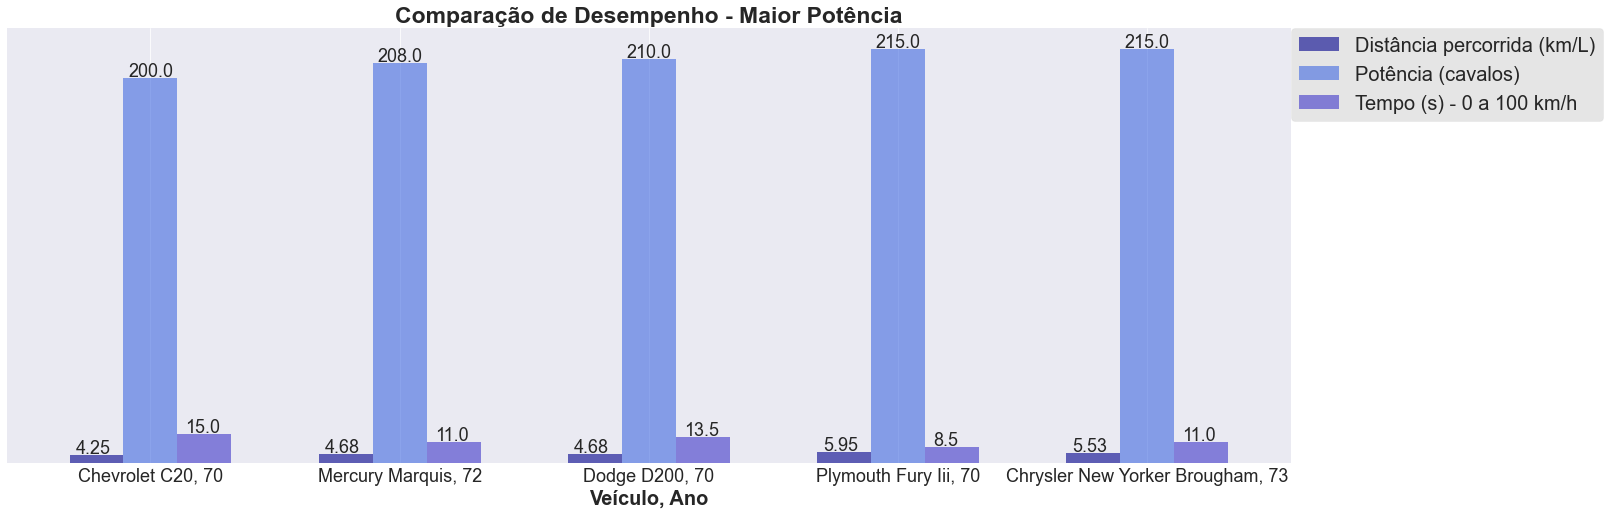

In [11]:
plt.rcParams['figure.figsize'] = [23, 8]

select_columns = ['km/l', 'horsepower', 'time-to-100km/h']
x_position = [0.3, .09, -.14]

df_cars.sort_values(by='horsepower').iloc[-16: -11].plot(x='name_year',
                                                   y=['km/l', 'horsepower', 'time-to-100km/h'], 
                                                   kind="bar", 
                                                   color = ['darkblue','royalblue', '#3F37C9'], alpha = .6, 
                                                   label=['Distância percorrida (km/L)', 'Potência (cavalos)', 'Tempo (s) - 0 a 100 km/h'],
                                                   width=0.65)

 
for i in range(0, 3):
    for index, value in enumerate(df_cars.sort_values(by='horsepower').iloc[-16: -11][select_columns[i]]):
        plt.text(index - x_position[i], value + 1, str(df_cars.sort_values(by='horsepower').iloc[-16 + index][select_columns[i]]))


plt.title('Comparação de Desempenho - Maior Potência', fontsize=23, weight='bold')
plt.xlabel('Veículo, Ano', fontsize=20, weight='bold')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize=20, frameon=True, framealpha=0.2, facecolor='grey', markerscale=2)
plt.yticks([], [])
plt.xticks(rotation=0);

### Comparação do veículo mais antigo e o mais novo

In [12]:
old_car = list(df_cars.iloc[:, [0,1,3,5]][df_cars['name_year'] == 'Chevrolet Chevelle Malibu, 70'].values[0])

new_car = list(df_cars.iloc[:, [0,1,3,5]][df_cars['name_year'] == 'Chevrolet S-10, 82'].values[0])

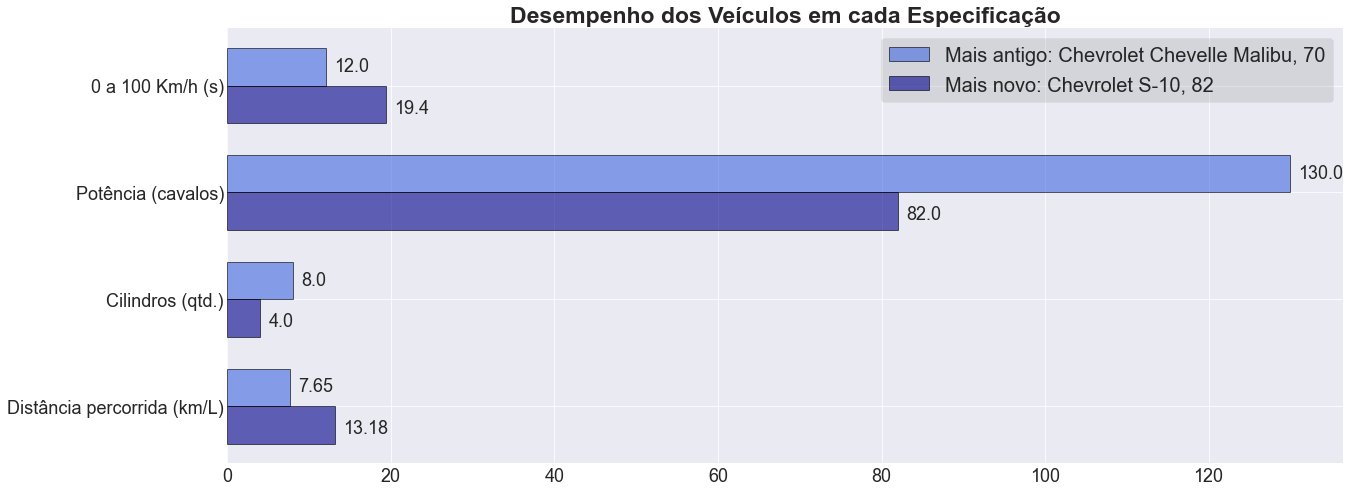

In [13]:
plt.figure(figsize=(20,8))
bar_width = .35
index = np.arange(4)

plt.barh(index,
         old_car, 
         ec = "k", 
         alpha = .6, 
         color = "royalblue", 
         height = bar_width, 
         label = f"Mais antigo: {df_cars.sort_values(by='year', ascending=False).iloc[-1]['name_year']}"
         )

plt.barh(index - bar_width,
         new_car, 
         ec = "k", 
         alpha = .6, 
         color = "darkblue", 
         height = bar_width, 
         label = f"Mais novo: {df_cars.sort_values(by='year', ascending=False).iloc[0]['name_year']}"
         )

for i, v in enumerate(old_car):
    plt.text(v + 1, i - .04, str(v))
for i, v in enumerate(new_car):
    plt.text(v + 1, i - .43, str(v))
    
plt.yticks(index - bar_width / 2, ('Distância percorrida (km/L)', 'Cilindros (qtd.)', 'Potência (cavalos)', '0 a 100 Km/h (s)'))
plt.title("Desempenho dos Veículos em cada Especificação", fontsize=23, weight='bold')
plt.legend(fontsize=20, frameon=True, framealpha=0.2, facecolor='grey');

### Quantia segundo os dados contidos no dataset em questão

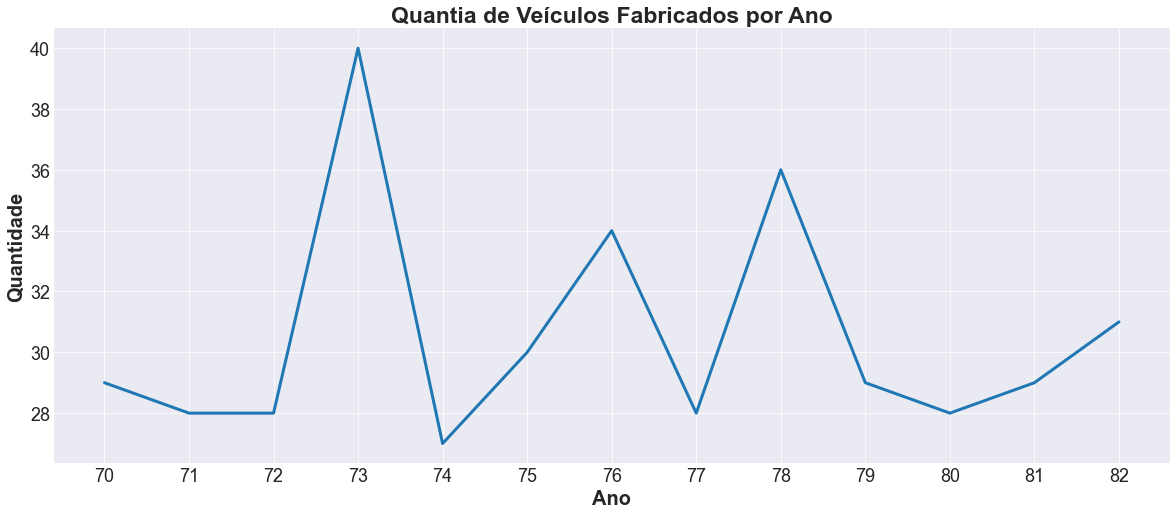

In [14]:
plt.figure(figsize=(20,8))

sns.lineplot(x='year', y='quantity',
             data=df_cars.groupby('year')['origin'].count().rename('quantity').reset_index(),
             linewidth=3)

plt.title(f'Quantia de Veículos Fabricados por Ano', fontsize=23, weight='bold')
plt.xlabel('Ano', fontsize=20, weight='bold')
plt.ylabel('Quantidade', fontsize=20, weight='bold');

### Comparação: Geral / Diesel (economia)

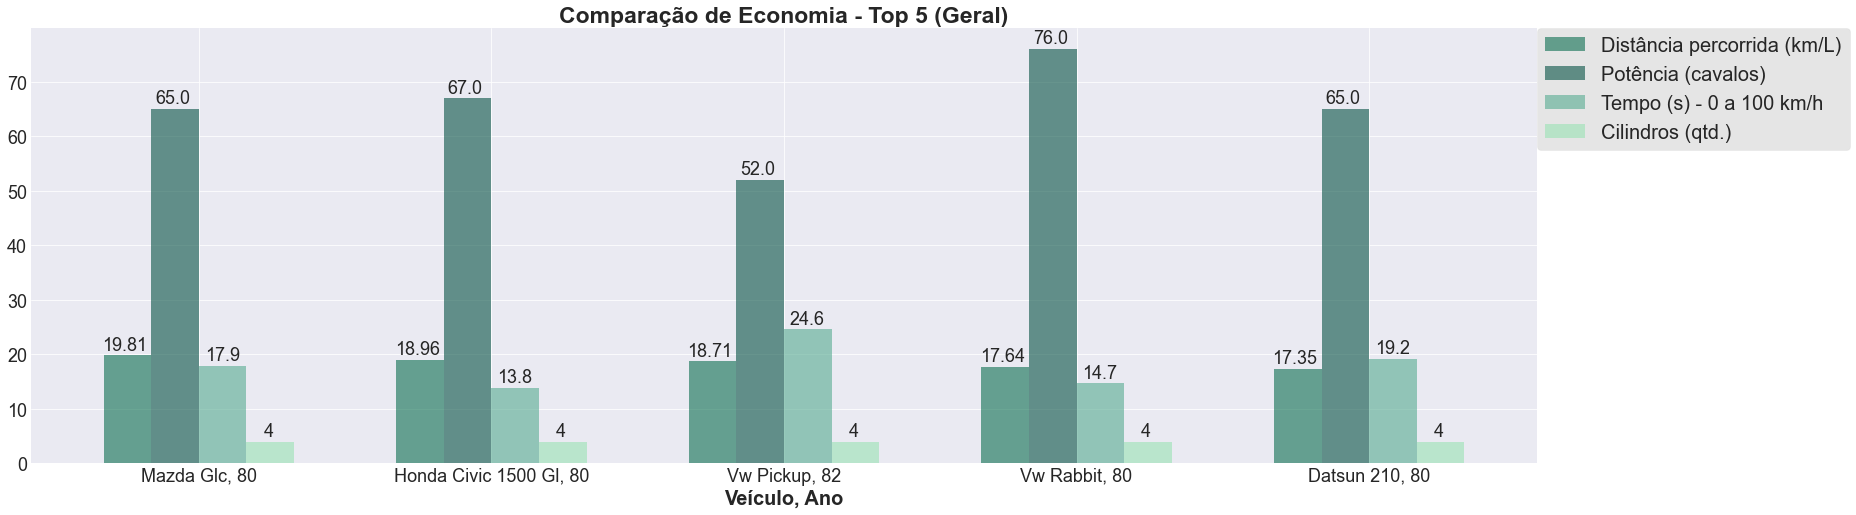

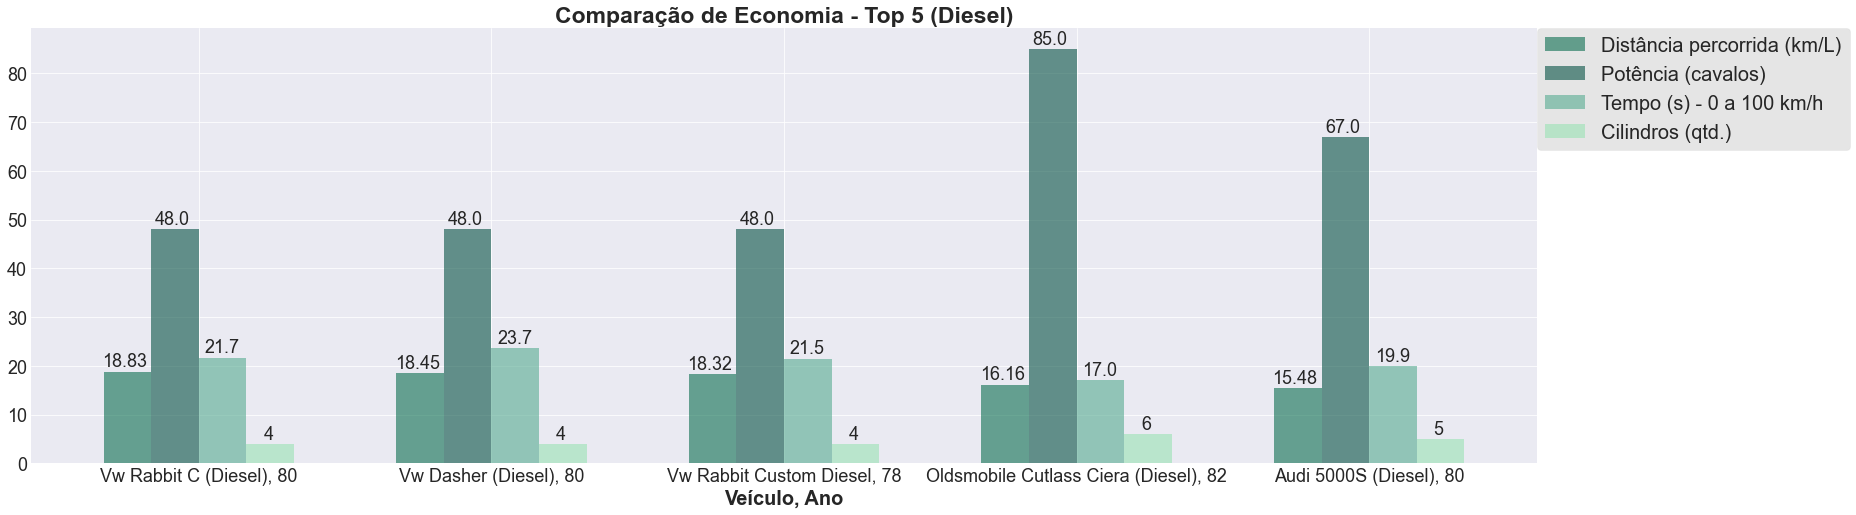

In [15]:
plt.rcParams['figure.figsize'] = [27, 8]

combus_select = ['Geral', 'Diesel']
select_bool = [False, True]
select_columns = ['km/l', 'horsepower', 'time-to-100km/h', 'cylinders']
x_position = [0.33, .15, -.02, -.22]

for booli in range(0, 2):
    df_cars[df_cars['name'].str.contains('Diesel') == select_bool[booli]].sort_values(by='km/l', ascending=False).iloc[:5].\
                                                  plot(x='name_year',
                                                       y=['km/l', 'horsepower', 'time-to-100km/h', 'cylinders'], 
                                                       kind="bar", 
                                                       color = ['#0b6e4f','#065143', '#56ab91', '#99e2b4'], alpha = .6, 
                                                       label=['Distância percorrida (km/L)', 'Potência (cavalos)', 'Tempo (s) - 0 a 100 km/h', 'Cilindros (qtd.)'],
                                                       width=0.65)

    for i in range(0, 4):
        for index, value in enumerate(df_cars[df_cars['name'].str.contains('Diesel') == select_bool[booli]].sort_values(by='km/l', ascending=False).iloc[:5][select_columns[i]]):
            plt.text(index - x_position[i], value + 1, str(df_cars[df_cars['name'].str.contains('Diesel') == select_bool[booli]].sort_values(by='km/l', ascending=False).iloc[index][select_columns[i]]))

    
    plt.title(f'Comparação de Economia - Top 5 ({combus_select[booli]})', fontsize=23, weight='bold')
    plt.xlabel('Veículo, Ano', fontsize=20, weight='bold')
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., fontsize=20, frameon=True, framealpha=0.2, facecolor='grey', markerscale=2)
    plt.xticks(rotation=0);